11/24/2018
# Learning and Exploring Artificial Neural Networks
I've always been interested in technology and exploring how the body works from since I can remember.  Simulating the entire human body in a computer is the ultimate goal of mine, but the practicallity of that is years off in the future.  I'm mostly interested in simulating the human mind, not because it would be a great scientific feat, but for the very fact that it can be maniuplated.  This interest of mine landed me on the font door step of artificial intelligence (AI).  Before I sat down and started studying about AI, I wanted to get an appreciation for the subject matter.  I've started to look at a lot of video's that were informative about AI at the 10,000ft level over the course of a couple months.  This appreciation period made me realize that I wanted to study deep learning.  Deep learning is part of machine learning and machine learning is part of AI. I also wanted to figure out where to start my study, top down or bottom up.  Even though a top down approach would of allowed me to get started doing real practical work, I'm the type of person who enjoys starting from the bottom up and learning the fundamentals.  Therefore, I decided to start as far back as practically possible, the history of the perceptron.

<figure style="text-align:center;">
  <img src="Images/AI_ML_DL.png" style="width:40%" />
  <figcaption>Artificial Intelligence, Machine Learning, and Deep Learning Relationship</figcaption>
</figure> 

# Brief History Overview
Artificial Neural Networks (ANN's) are inspired by the brain, a biological neural network.  Neural networks are made up of connected neurons to carry out specific functions/computations when activated.  [Warren Sturgis McCulloch](https://en.wikipedia.org/wiki/Warren_Sturgis_McCulloch), a neurophysiologist, and [Walter Pitts](https://en.wikipedia.org/wiki/Walter_Pitts), a logician, worked in the field of computational neuroscience and created computational models based on mathematical algorithms called threshold logic.  [Frank Rosenblatt](https://en.wikipedia.org/wiki/Frank_Rosenblatt) introduced the perceptron in 1958 inspired by the earlier work of Warren McCulloch.  There was an optimism about the power of the perceptron. In the 1960's the optimism came to a halt after [Marvin Minksy's](https://en.wikipedia.org/wiki/Marvin_Minsky) and [Seymour Papert's](https://en.wikipedia.org/wiki/Seymour_Papert) 1969 book, [Perceptrons](https://www.amazon.com/Perceptrons-Introduction-Computational-Geometry-Expanded/dp/0262631113), was published.  The book showed there're severe limitations to what the perceptron can do and that Frank's claims were exaggerated.  One of the limitations of the perceptron is its inability to solve a simple function called, the [exclusive disjunction (XOR)](https://en.wikipedia.org/wiki/Exclusive_or).  This had a negative effect of the research community and research in connectionism stopped for 10 years.  To learn more about the building blocks the perceptron is built on, read the book, [Neural Networks. A Systematic Introduction](https://www.semanticscholar.org/paper/Neural-Networks-A-Systematic-Introduction-Rojas/0ab5e90d14264b7faf406c15615a4f08cc945f27).

# What is a Neuron?
The neuron is the basic working unit of the brain, a specialized cell designed to transmit information to other nerve, muscle, or gland cells.  It was estimated that a human brain has approximately 100 billion neurons, but no one knew where this number came from.  Brazilian researcher, [Dr. Suzana Herculano-Houzel](https://en.wikipedia.org/wiki/Suzana_Herculano-Houzel), decided to find out where this number originated, but didn't have much luck.  She decided to count them herself and discovered a method to do just that.  She discovered the human brain has approximately 86 billion neurons in total.  This may seem like a small difference from 100 billion, so to provide more context around this number, the following is a list of other animals and the number of neurons they have:

- Fruit fly: 100 thousand neurons
- Cockroach: One million neurons
- Mouse: 75 million neurons
- Cat: One billion neurons
- Chimpanzee: 7 billion neurons
- Elephant: 23 billion neurons

Most neurons have a cell body, an axon, and dendrites. The cell body contains the nucleus and cytoplasm. The axon extends from the cell body and often gives rise to many smaller branches before ending at nerve terminals. Dendrites extend from the neuron cell body and receive messages from other neurons. Synapses are the contact points where one neuron communicates with another. The dendrites are covered with synapses formed by the ends of axons from other neurons.  
<br>
<br>
<figure style="text-align:center;">
  <img src="Images/blakerichards_neuron.jpg" style="width:50%" />
  <figcaption>Real Neuron (credit: Blake Richards)</figcaption>
</figure> 
<br>
<br>
<figure style="text-align:center;">
  <img src="Images/cartoon_neuron.png" style="width:50%" />
  <figcaption>Biological Neuron</figcaption>
</figure> 
<br>
<br>

# Perceptron
A perceptron is an algorithm that is inspired by a single biological neuron. There has been a lot of research over the years inventing the building blocks of the perceptron.  Read [Threshold Logic](ThresholdLogic.ipynb) to get a perspective on what it took to get here. The perceptron algorithm is more formally called a binary classifier, a type of linear classifier. A classifier separates data into categories, and in this case, the perceptron is designed to predict the inputs category.  Our brains do this without much effort, such as classifying mammales and reptiles, fruit and vegtables, and ect.  The perceptron simply takes some inputs and performs a mathematical process and spits out an output/classification/prediction.  In order to look into this mathematical process in more detail, let's look at a more detailed graph.

<figure style="text-align:center;">
  <img src="Images/abstract_perceptron.png" style="width:50%">
  <figcaption>Formal Perceptron Structure - Details</figcaption>
</figure> 

The perceptrons' algorithm computes the output in two steps and they're described in the blue circle.  The first step is to compute the weighted sum of the inputs, called $z$.  The second step computes the activation function with the input $z$.  This two step process, is called the Feed Forward process. In the machine learning field, the output of a perceptron is called a prediction.

<ol>
  <li>Weighted Sum of the Inputs<br>
      This is the sum of all inputs multiplied by their weighted connections.
  </li>
  <li>Activation Function<br>
      There're many different types of activation functions and they translate the output to be within a desired range. This is an important concept in neural network based machine learning.  
  </li>
</ol>

Let's look at a perceptron with 2 inputs.  The inputs and outputs of a perceptron are just numbers. The activation function of a binary classifier takes some inputs and produces a binary output (i.e. {-1, 1}). What mathematical function can turn any number (i.e. weighted sum) into a binary output?  The Sign function is one such function, and it will be used as the activation function in the implementation.  Simply, the Sign function takes any number as an input and then outputs a binary value, i.e {-1, 1}.  The formal Sign function is defined in the equation below.

\begin{equation}
  sgn(x)=\begin{cases}
    -1, & \text{if $x<0$},\\
    0, & \text{if $x=0$},\\
    1, & \text{if $x>0$}
  \end{cases}
\end{equation}

I said we need a activation function that outputs a binary value, but the above Sign equation outputs three values {-1, 0, 1}.  We have to simplify it for implementation purposes, and the modified definition is shown below.  Take notice that it now outputs two values {-1, 1}.

\begin{equation}
  sgn(x)=\begin{cases}
    -1, & \text{if $x<0$},\\
    1, & \text{if $x\geq0$}
  \end{cases}
\end{equation}

Now that we have an appropriate activation function, the perceptron looks like the following computational graph below.  You can see the two computational steps, weighted sum and activation function, described in the blue circle.  The computation is also written out in mathematical notation.

<figure style="text-align:center;">
  <img src="Images/perceptron_example1.png" style="width:50%">
  <figcaption>Formal Perceptron Structure - Details</figcaption>
</figure> 
<br>

$$prediction = sgn(x_1 \cdot w_1+x_2 \cdot w_2)$$  
<br>

Let's take a minute to look at what we are trying to do again.  We want our perceptron to predict what category our set of inputs, $x_1$ and $x_2$, belong to.  The categories are not known at this point, but we will cover that later.  $x_1$ and $x_2$ are the inputs that will be fed into an equation to compute a prediction, but what are the weights, $w_1$ and $w_2$?  These weights will need to be **learned** using a supervised learning algorithm.  The learning process will find the optimum weights to correctly categorize the inputs.  Before the learning process starts, these weights will be set to random values. Initializing the weights of a perceptron can be more sophisticated than randomly assigning values, but it's not in the scope of this paper.  If you want to read more about it, check out this notebook, [Initialization Notebook](NeuralNetworkInitialization.ipynb).

A perceptron learns by training it with training data.  Training data is a set of inputs and outputs.  The outputs are typically called labels in a training set.  I know this sounds very vauge, so let's walk-thru an analogy.  Let's imagine a kid is trying to learn the difference between dog and cat pictures.  The kid might have a set of dog and cat pictures with the answers on the back.  The kid would look at each picture, guess whether it's a picture of a dog or cat, and then look at the answers on the back to determine if the guess was correct.  If the kid guessed correctly, he does nothing.  If the kid guessed incorrectly, he'll make the appropriate adjustments in his mind.  For instance, maybe the kid didn't know cats can be bigger than dogs and might classify a large cat as a dog.  The kid will remember that some cats are bigger than dogs so next time he doesn't make the same mistake.  With enough time, the kid will be able to classify all the pictures correctly.  In this analogy, the set of pictures is considered the training data where the pictures would be the inputs and the answers on the back would be the lables/outputs.  Once a perceptron is trained, it should be able to correctly classify dog and cat pictures that it hasn't seen before.

Using the same analogy, we can imagine that if the kid did classify a picture incorrectly, he'll be able to tell you how much he was off.  For instance, classifying a Pitbull as a cat is much more incorrect than classifying a Chihuahua as a cat.  This is very important for perceptrons because if the error can be computed then the algorithm can be adjusted accordingly.  With a prediction and a label, an error can be computed.  The error is computed by subtracting the prediction from the label.

$$error = label - prediction$$

The above $error$ function computes the cost for one training example, but we need to compute the cost/error for all training examples.  Before we do this, let's use standard mathematical notation.  For each value $i$ in the training example, we can say that $t^{(i)}$ is the target value for the $i^{th}$ training example and $y^{(i)}$ is the guess produced by the current set of weights in the perceptron.  Let's look at the above $error$ function again using this new notation.

$$E = t^{(i)} - y^{(i)}$$

Therefore, the cumulative error/cost for the training data is defined below.  If you're familiar with statistics, you'll recognize the formula as the [Mean Squared Error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error).

$$E=\dfrac{1}{2}\sum_i(t^{(i)}-y^{(i)})^{2}$$

All possible error values for a perceptron are  in the table below.

| label | prediction | error |
| :---: | :---: | :---: |
| -1 | -1 | 0 |
| -1 | 1 | -2 |
| 1 | -1 | 2 |
|  1 | 1 | 0 |

Once the error can be computed, then how is the algorithm adjusted so that it learns not to make the same mistake in the future.  As stated above, the weights, $w_1$ and $w_2$, need to be adjusted up or down relative to the magnitude of the error.  The amount $w_1$ and $w_2$ change is defined by the mathemtatical terms $\Delta w_1$ and $\Delta w_2$.  These terms can be read as "the change in $w_1$ and the change in $w_2$".  For instance, if it's determined that the weights need to be changed by 2, then $w_1$ and $w_2$ will decrease by 2. $\Delta w_1$ and $\Delta w_2$ do not have to be the same value, but they can be different.  Below are the equations that represent how to change the weights.

$$w_1 = w_1 - \Delta w_1$$
$$w_2 = w_2 - \Delta w_2$$

$$\text{Generically, } w_n = w_n - \Delta w_n$$

Now that we have the equations to adjust the weights, how are the delta's, $\Delta w_n$, computed? The $\Delta w_n$ will be computed using a process called gradient descent.  Gradient descent is not in the scope of this article, because there's already so much information on the internet about it, for instance, [Gradient Decent](https://en.wikipedia.org/wiki/Gradient_descent). 

Discuss exactly how and why the equations are the way they are.  Why multiply the error to the input?  What does it mean to multiply an error to an input?

The learningRate is a configurable parameter to adjust how fast to move down the gradient.  The $\Delta w_n$ can be computed using gradient descent as follows,

$$\Delta w_1 = error \cdot x_1 \cdot learningRate$$
$$\Delta w_2 = error \cdot x_2 \cdot learningRate$$

$$\text{Generically, }\Delta w_n = error \cdot x_n \cdot learningRate$$

Now that the feed forward algorithm and gradient descent can be computed, lets look at the entire supervised learning algorithm and then implement it in code.

1. Initialize a perceptron with random weights
2. Provide the perceptron with training data and the labels
3. Ask the perceptron to compute a prediction with a $sgn(x)$ function (a function that return's -1 or 1)
4. Compute the error (Did the perceptron get the answer right or wrong?)
5. Adjust weights with respect to the error
6. Return to step 2 and repeat

<figure>
  <img src="Images/perceptron_learning_steps1.png" style="width:75%">
</figure> 

There is a problem with the above perceptron.  Imagine if $x_1$ and $x_2$ are both 0, then it wouldn't matter what $w_1$ and $w_2$ are because they would always end up being 0 too.  To fix this problem, another input is added called the bias and the bias is always 1.  The algorithm will work the same, but instead of 2 inputs, it will work with three inputes with bias always being 1.  The bias will ensure that at least one input is not 0.  The figure below illustrates this concept.

<figure>
  <img src="Images/perceptron_structure3.png" style="width:50%">
</figure> 

Therefore, if a perceptron represents a liner line $y=mx+b$, then the line can be described as, ($x_3$ is the bias)

$$w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3 = 0$$
$$w_2 \cdot x_2 = -w_1 \cdot x_1 - w_3 \cdot x_3$$
$$x_2 = \dfrac{-w_1}{w_2} \cdot x_1 - \dfrac{w_3}{w_2} \cdot x_3$$


Let's jump right into the implementation. First let's add some library references that we'll need

In [83]:
%matplotlib inline
import plotly.offline as plt
import plotly.graph_objs as go
import numpy as np

To start, object-oriented programming will be used for better understanding.  The object that needs to be implemented is Perceptron. The Perceptron class is implemented as follows...

In [84]:
# ---------------------------
# class: Perceptron
# This perceptron has three inputs (including bias) and one output
# ---------------------------
class Perceptron:
    def __init__(self, numberOfFeatures, learningRate, bias, epochs):
        # create (numberOfFeatures) random weights (float) between -1 and 1
        # create an additional weight for the bias
        self.weights = np.random.uniform(-1, 1, numberOfFeatures + 1)
        self.learningRate = learningRate
        self.error = []
        self.bias = bias
        self.epochs = epochs
    
    # ---------------------------
    # Feed forward algorithm that takes inputs 
    # and produces and outputs 
    # ---------------------------
    def predict(self, inputs):
        weightedSum = 0
        
        # compute the weighted sum
        # first handle the bias
        weightedSum += self.bias * self.weights[0]
        # second, use dot product to calculated a weighted sum of the inputs and weights
        weightedSum = np.dot(inputs, self.weights[1:])
        
        # pass the weighted sum to the sign function (activation function)
        output = self.sign(weightedSum)
        
        #return output
        return output
    
    # ---------------------------
    # Activation Function - Basic step function
    # Return 1 if n is 1 or greater, else -1
    # ---------------------------
    def sign(self, n):
        if n >= 0:
            return 1
        else:
            return -1
    
    # ---------------------------
    # Trains the perceptron by determining the outputs
    # error and progating it backwards through the perceptron
    # ---------------------------
    def train(self, inputs, labels):

        for epoch in range(self.epochs):
            e = 0
            for inpt, label in zip(inputs, labels):
                guess = self.predict(inpt)
                error = label - guess

                #Adjust all the weights
                self.weights[0] += self.learningRate * error * self.bias
                self.weights[1:] += self.learningRate * error * inpt

                e += int((error * self.learningRate) != 0.0)
               
            self.error.append(e)
        


Below is an arbitrary data set plotted on a graph with a line through them.  The goal of this perceptron is to classify what points are below and above a given line.  What it means for a perceptron to learn to classify is that it learns a mathematical function to separate the two groups.  The mathematical function it will learn is represented by the line below.  Therefore, a perceptron or neural network is call a "Univesral Function Approximater".  The data points below represent training data for the perceptron.  Once the perceptron is trained it will be able to take in data points not listed in the graph below and predict if the point is below or above the line.  The perceptron that will be implemented will be trained using supervised learning and takes in inputs and outputs a 1 above the line and -1 for below the line.  The supervised learning approach means the training data below will be fed into the perceptron one-by-one and if it predicts the wrong category the perceptron will be penalized by tweaking it's algorithm programmatically.  Tweaking of the algorithm is known as gradient decent.  If the perceptron predicts the correct category, no penalty.  After training, the perceptron should be able to predict the correct category for data points not in the training set.

The formula for a line is represented like, $y=mx+b$.  The line that our perceptron will try to approximate below is $y=0.5x+20$.  As indicated in the graph below, the line passes through the y-intercept at 20 and has a slope of 0.5.

Let's create some random points

In [85]:
# Set number of points
numberOfPoints = 500

# Initialize the points and labels array
points = np.zeros(shape=(numberOfPoints, 2))
labels = []

# Initialize random points between 1 and 100
for i in range(numberOfPoints):
    x = np.random.randint(-250, 250)
    y = np.random.randint(-250, 250)
    label = 1 if (x>y) else -1
    points[i] = [x,y]
    labels.append(label)

Now let's plot the random points on a graph

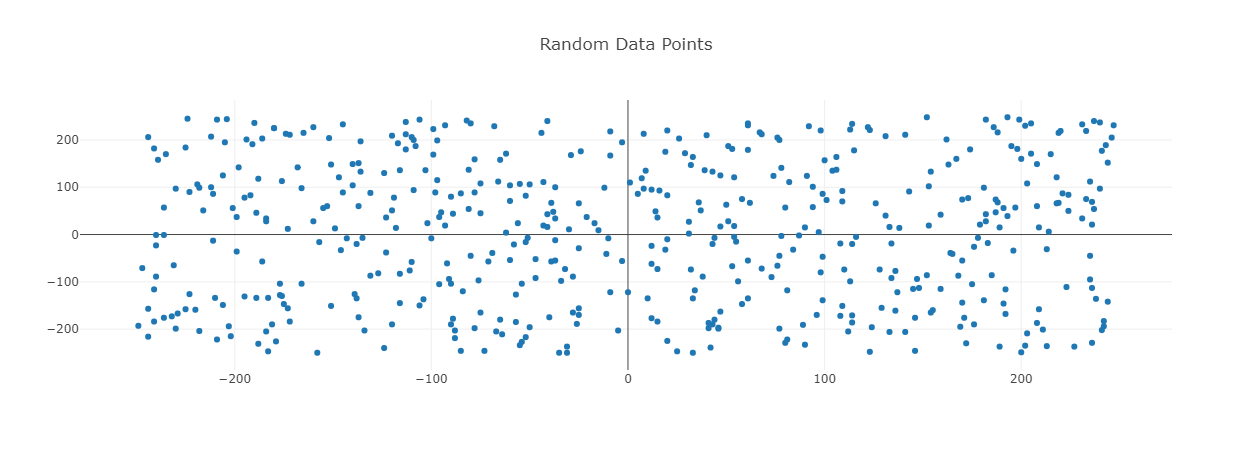

In [86]:
# Create scatter plot points using the random points created above
# All x-coordinates go into one array and all y-coordinates into another
graphPoints = go.Scatter(
    x = points[:, [0]].flatten(),
    y = points[:, [1]].flatten(),
    mode = 'markers',
    marker = dict(
        symbol = 'circle'
    ),
    name = 'Random Data'
    
)

layout = go.Layout(
    title='Random Data Points',
    xaxis=dict(
        title='$x-axis\\text{ }(x_1)$'
    ),
    yaxis=dict(
        title='$y-axis\\text{ }(x_2)$'
    )
)

fig = go.Figure(data=[graphPoints], layout=layout)
plt.iplot(fig)


Let's graph a line through the points in which we want to perdict

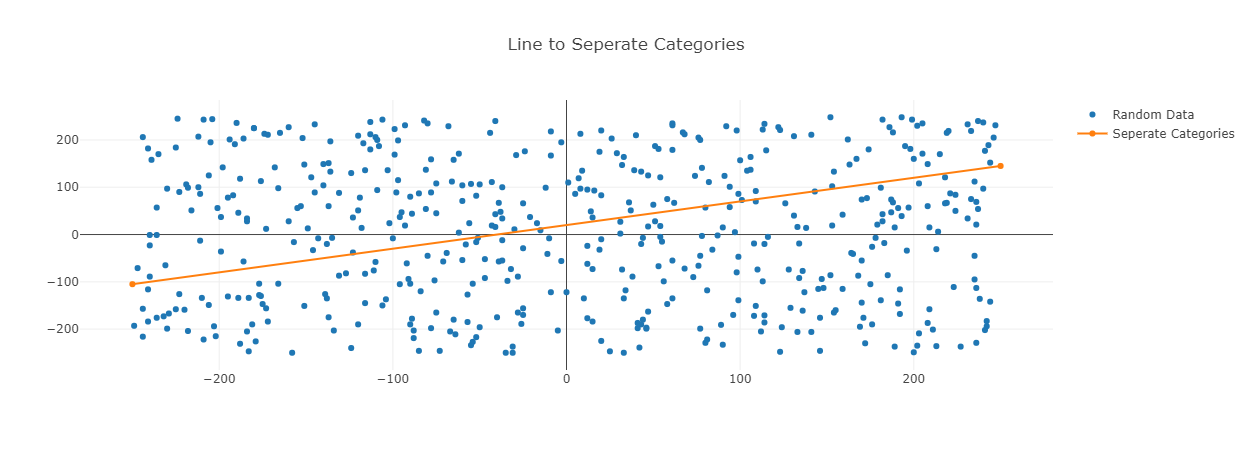

In [87]:
# Plot a line y=mx+b
x = np.linspace(-250,250,2)
m = 0.5
b = 20
y = m*x+b

line = go.Scatter(
    x = x,
    y = y,
    name = 'Seperate Categories'
)

layout.title = 'Line to Seperate Categories'
fig = go.Figure(data=[graphPoints, line], layout=layout)
plt.iplot(fig)

Now let's create a Perceptron and use it to guess if the points are above the line or below the line

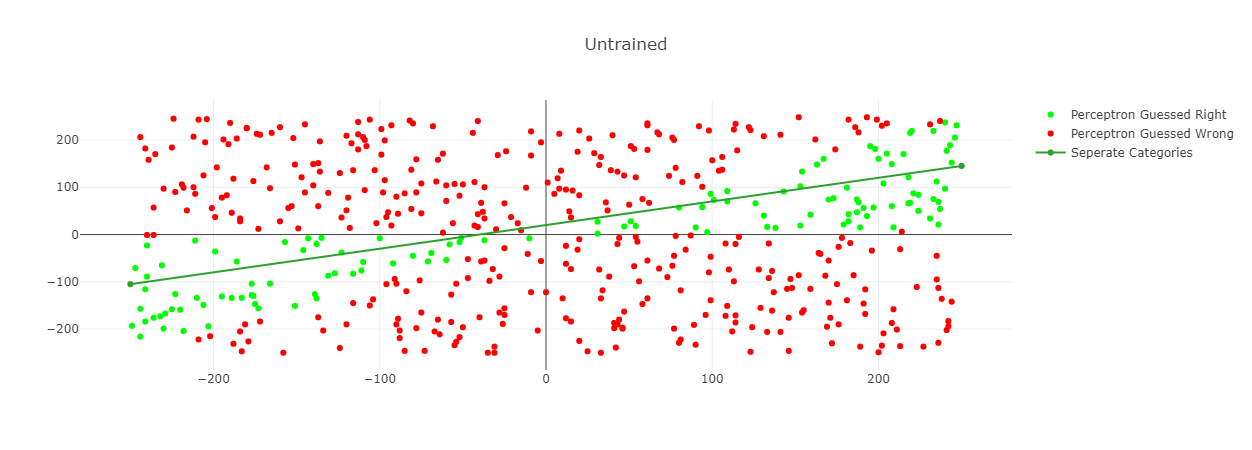

In [88]:
# 
# 1. Using the untrained perceptron, guess if the data points are above or below the line
# 2. Train the perceptron
# 3. Using the trained perceptron, guess if the data points are above or below the line
#
# Note: Green points mean a correct prediction and red points mean an incorrect prediction.
# After the perceptron is trained, all points should be green
#

# Create a Perceptron
numberOfFeatures = 2
learningRate = 0.001
bias = 1
epochs = 100
perceptron = Perceptron(numberOfFeatures, learningRate, bias, epochs)

# Display the Perceptrons' predictions
# The predictions are incorrect because the perceptron hasn't been trained
# 
c = np.empty(shape=(0, 2))
w = np.empty(shape=(0, 2))

for point, label in zip(points, labels):
    guess = perceptron.predict(point)
    
    if guess == label:
        c = np.append(c, np.array([point]), axis=0)
    else:
        w = np.append(w, np.array([point]), axis=0)

correct = go.Scatter(
    x = c[:, [0]].flatten(),
    y = c[:, [1]].flatten(),
    mode = 'markers',
    marker = dict(
        symbol = 'circle',
        color = 'rgb(0, 255, 0)'
    ),
    name = 'Perceptron Guessed Right'   
)

wrong = go.Scatter(
    x = w[:, [0]].flatten(),
    y = w[:, [1]].flatten(),
    mode = 'markers',
    marker = dict(
        symbol = 'circle',
        color = 'rgb(255, 0, 0)'
    ),
    name = 'Perceptron Guessed Wrong'  
)

layout.title = 'Untrained'
fig = go.Figure(data=[correct, wrong, line], layout=layout)
plt.iplot(fig)

The perceptron does poorly at guess which points are above and below the line.  The green points indicate a correct guess by the perceptron and red otherwise.

Next, let's train the perceptron.

In [89]:
# Train the Perceptron
perceptron.train(points, labels)

Now let's see how the perceptron performs now

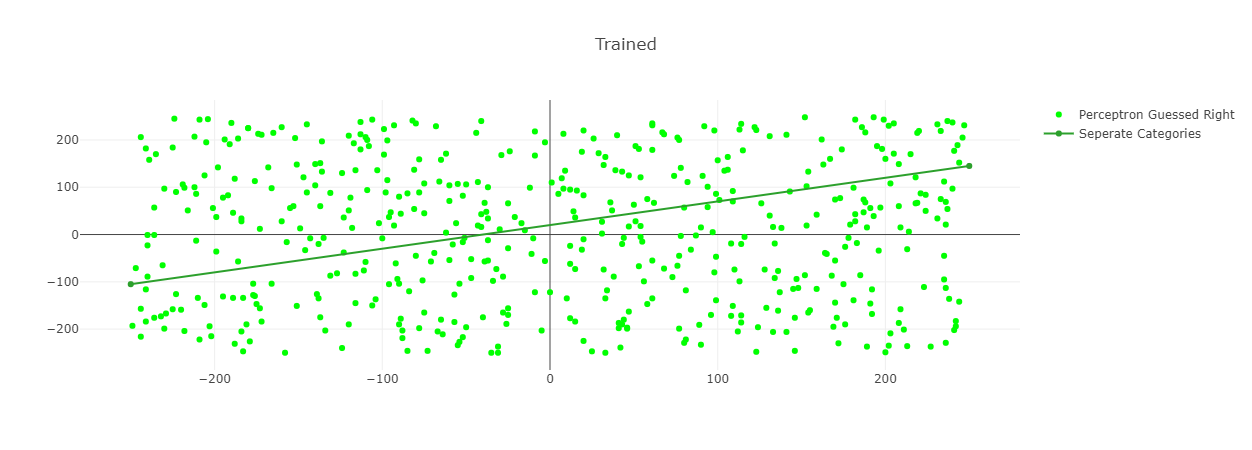

In [90]:
c = np.empty(shape=(0, 2))
w = np.empty(shape=(0, 2))

# Display the Perceptrons' predictions
# The predictions are correct because the perceptrons has been trained
for point, label in zip(points, labels):
    guess = perceptron.predict(point)
    
    if guess == label:
        c = np.append(c, np.array([point]), axis=0)
    else:
        w = np.append(w, np.array([point]), axis=0)

correct = go.Scatter(
    x = c[:, [0]].flatten(),
    y = c[:, [1]].flatten(),
    mode = 'markers',
    marker = dict(
        symbol = 'circle',
        color = 'rgb(0, 255, 0)'
    ),
    name = 'Perceptron Guessed Right'   
)

wrong = go.Scatter(
    x = w[:, [0]].flatten(),
    y = w[:, [1]].flatten(),
    mode = 'markers',
    marker = dict(
        symbol = 'circle',
        color = 'rgb(255, 0, 0)'
    ),
    name = 'Perceptron Guessed Wrong'  
)

layout.title = 'Trained'
fig = go.Figure(data=[correct, wrong, line], layout=layout)
plt.iplot(fig)   

It's good to always view how well your algorithm does over time.  Looking at the loss/error can give us a good indication that the algorithm is working and getting better with each iteration.  This will be very important when implementing multi-layer neural networks. The error should be minimized to zero for perfect solution.  These parameters

    numberOfFeatures = 2
    learningRate = 0.001
    bias = 1
    epochs = 100

can be experimented with to see how it affects the algorithms performance.  For instance, with a small learning rate and a large feature set, the algorithm error function should converge to zero relatively slowely.

In [91]:
print(perceptron.error)

[21, 16, 10, 11, 10, 8, 8, 14, 11, 14, 11, 14, 7, 11, 9, 7, 6, 11, 8, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


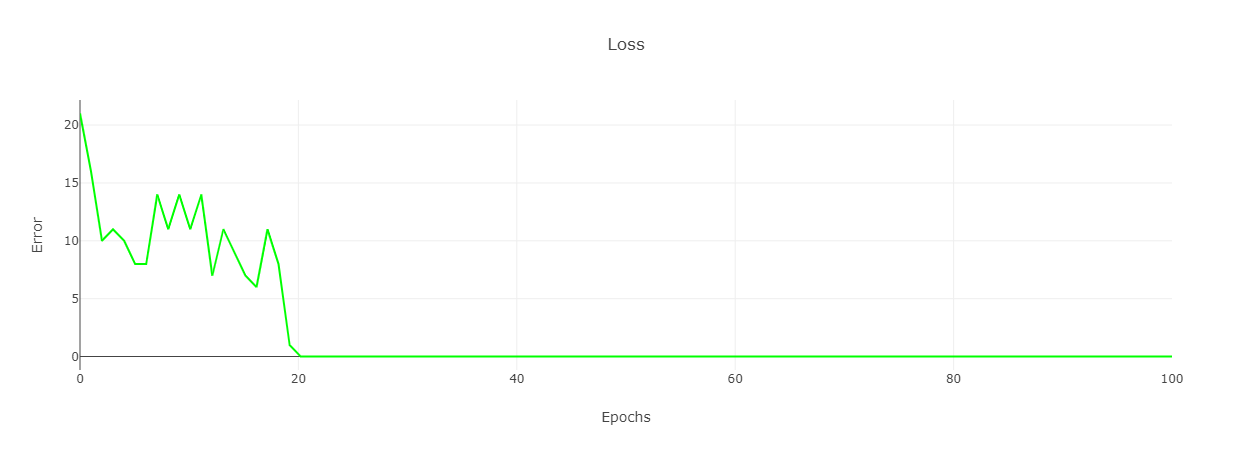

In [92]:
errorGraphPoints = go.Scatter(
    x = np.linspace(0, len(perceptron.error), len(perceptron.error)),
    y = perceptron.error,
    mode = 'lines',
    marker = dict(
        symbol = 'circle',
        color = 'rgb(0, 255, 0)'
    ),
    name = 'Loss'   
)

layout = go.Layout(
    title='Loss',
    xaxis=dict(
        title='Epochs'
    ),
    yaxis=dict(
        title='Error'
    )
)

fig = go.Figure(data=[errorGraphPoints], layout=layout)
plt.iplot(fig)   